In [82]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

#  <span style="color:yellow"> <font size="5">#logistic regression model  </span> </font>  

### 1. 데이터 형태 파악 및 x,y 구분 

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.csv')

In [5]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [6]:
print(data.shape)

(683, 11)


In [8]:
X1 = data [['Clump_Thickness', 'Cell_Size', 'Cell_Shape','Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
y = data[['Class']] # 컬럼 1개일때, [[]] 해줘야 Dataframe 형태로 저장됨.  [] 하나로 하면 Series 형태로 저장됨. 

In [10]:
print(X1.shape)
print(y.shape)

(683, 9)
(683, 1)


### 2. train - test 데이터 셋 나누기 

In [11]:
from sklearn.model_selection import train_test_split

In [37]:
x_train ,x_test ,y_train ,y_test = train_test_split(X1,y, stratify = y , random_state =42 )

In [38]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


### 3. 정규화 

In [21]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

#### min-max reg

In [39]:
# min-max 정규화 
scaler_minmax = MinMaxScaler()

In [40]:
scaler_minmax.fit(x_train)
x_scaler_minmax_train = scaler_minmax.transform(x_train)
pd.DataFrame(x_scaler_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#scaler_minmax.fit() 
  #[ 데이터의 정규화에서는 변환기준이 TRAIN DATA SET을 기준으로 적용됨, 따라서 fit에서 train데이터를 기준으로 데이터셋의 정규화 기준이 기억되고
x_scaler_minmax_test = scaler_minmax.transform(x_test)
pd.DataFrame(x_scaler_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### standard - reg

In [42]:
# 표준 정규화
scaler_standard = StandardScaler()

In [45]:
scaler_standard.fit(x_train)
x_scaler_standard_train = scaler_standard.transform(x_train)
pd.DataFrame(x_scaler_standard).describe()

,0,1,2,3,4,5,6,7,8
count,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02
mean,1.547657e-16,-1.168656e-17,-1.817909e-17,2.986565e-17,1.077760e-16,-8.699993e-17,1.834140e-17,-9.771261e-17,-2.791789e-17
std,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00
min,-1.212273e+00,-7.078056e-01,-7.471015e-01,-6.285647e-01,-1.013387e+00,-7.068043e-01,-9.500202e-01,-6.348652e-01,-3.663175e-01
25%,-8.447219e-01,-7.078056e-01,-7.471015e-01,-6.285647e-01,-5.621129e-01,-7.068043e-01,-9.500202e-01,-6.348652e-01,-3.663175e-01
50%,-1.096204e-01,-7.078056e-01,-7.471015e-01,-6.285647e-01,-5.621129e-01,-7.068043e-01,-5.498885e-01,-6.348652e-01,-3.663175e-01
75%,6.254811e-01,5.662445e-01,5.733569e-01,4.016388e-01,3.404346e-01,8.074313e-01,6.505064e-01,3.091517e-01,-3.663175e-01
max,2.095684e+00,2.158807e+00,2.223930e+00,2.462046e+00,3.048077e+00,1.771036e+00,2.651165e+00,2.197185e+00,3.689529e+00


In [46]:
#scaler_standard.fit()
x_scaler_standard_test = scaler_standard.transform(x_test)
pd.DataFrame(x_scaler_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


### 4. 모델 학습 _ [based on min_max_reg data]

In [48]:
from sklearn.linear_model import LogisticRegression 

In [83]:
model = LogisticRegression()
model.fit(x_scaler_minmax_train, y_train)

LogisticRegression()

#### *train set 결과 

In [52]:
pred_train = model.predict(x_scaler_minmax_train)  # x train 데이터를 학습된 model에 넣고 돌린 예측 결과값 
model.score(x_scaler_minmax_train, y_train)     # x train 데이터를 학습된 model에 놓고 돌린 후 --> 그 y^을 실제 train y 값과 비교.

0.97265625

#### *test set 결과

In [58]:
pred_test = model.predict(x_scaler_minmax_test)
model.score(x_scaler_minmax_test,y_test)

0.9590643274853801

#### *혼동 오차 행렬 [ confusion matrix ] 

In [60]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_train = confusion_matrix(y_train,pred_train)
print("train_dataset and pred_train confusion_matrix : \n", confusion_train)

train_dataset and pred_train confusion_matrix : 
 [[328   5]
 [  9 170]]


In [65]:
confusion_test = confusion_matrix(y_test,pred_test)
print("test_dataset and pred_test confusion_matrix : \n", confusion_test)

test_dataset and pred_test confusion_matrix : 
 [[106   5]
 [  2  58]]


##  <span style="color:yellow"> <font size="5">[REPORT] Logistic Regression _ Result   </span> </font> 

In [66]:
from sklearn.metrics import classification_report 

In [67]:
cfreport_train = classification_report(y_train, pred_train)
print("분류 예측 모델 _train dataset : \n" , cfreport_train)

분류 예측 모델 _train dataset : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [68]:
cfreport_test = classification_report(y_test, pred_test)
print("분류 예측 모델 _test dataset : \n" , cfreport_test)

분류 예측 모델 _test dataset : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#

## <span style="color:yellow"> <font size="5"> ROC CURVE Graph  </span> </font> 

In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics 

In [73]:
fp_rate , tp_rate, thresholds = roc_curve(y_test, model.decision_function(x_scaler_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(x_scaler_minmax_test))
roc_auc

0.9923423423423423

In [74]:
import matplotlib.pyplot as plt 

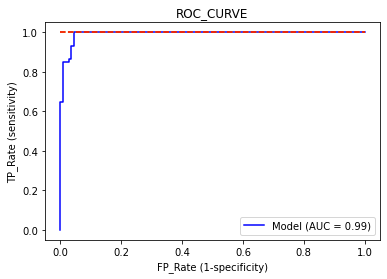

In [81]:
plt.title("ROC_CURVE")
plt.xlabel('FP_Rate (1-specificity)')
plt.ylabel('TP_Rate (sensitivity)') 

plt.plot(fp_rate, tp_rate, "b", label = 'Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[1,1],'r--')

plt.legend(loc = "lower right")
plt.show()

#

## <span style="color:yellow"> <font size="5"> 예측값 병합 및 저장  </span> </font> 

## predict_proba 함수 --> row별로 각각의 독립변수 조건들을 토대로 y값을 결정함. 

## 그 과정에서 과연 y값이 0이냐 1이냐 ( 해당 데이터는 정상(0), 유방암(1) 이냐를 판단 )

## 몇 %의 확률로 0인지 1인지를 결정하는지 확인해 주는 함수 .

## 

#### train dataset을 기반 --> 예측확률 데이터를 추가

In [86]:
prod_train = model.predict_proba(x_scaler_minmax_train)

In [88]:
prod_train # Y값이 0이냐 1이냐, 확률이 어느정도 인가를 보여줌. 

array([[0.98101387, 0.01898613],
       [0.7681914 , 0.2318086 ],
       [0.96643115, 0.03356885],
       ...,
       [0.11344041, 0.88655959],
       [0.98740488, 0.01259512],
       [0.99046984, 0.00953016]])

In [91]:
y_train['y_pred'] = pred_train

In [94]:
y_train[['y_prob0(정상으로 판단할 확률)','y_prob1(유방암으로 판단할 확률)']] = prod_train

In [95]:
y_train.head(3) # _ Train dataset을 기준으로! 

,Class,y_pred,y_prob0(정상으로 판단할 확률),y_prob1(유방암으로 판단할 확률)
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569


#### test dataset을 기반 --> 예측확률 데이터를 추가

In [97]:
prod_test = model.predict_proba(x_scaler_minmax_test)

In [99]:
prod_test[1:5]

array([[0.97088661, 0.02911339],
       [0.94357177, 0.05642823],
       [0.97937032, 0.02062968],
       [0.00130504, 0.99869496]])

In [103]:
y_test['y_pred'] = pred_test

In [105]:
y_test[['y_prob0(정상으로 판단할 확률)','y_prob1(유방암으로 판단할 확률)']] = prod_test

In [107]:
y_test.head(3)

,Class,y_pred,y_prob0(정상으로 판단할 확률),y_prob1(유방암으로 판단할 확률)
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428


#### data 병합 처리 

In [109]:
total_test = pd.concat([x_test,y_test],axis=1)

In [111]:
total_test.head(3)

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0(정상으로 판단할 확률),y_prob1(유방암으로 판단할 확률)
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428


total_test.to_csv('total_Test_result.csv') 